In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Basic CNN:
        # Convolution -> Relu -> Linear transformation -> Relu ->  Output (10 features)
        self.conv = nn.Conv2d(1, 1, 3)
        self.linear = nn.Linear(26 * 26, 10)
    
    def forward(self, x):
        # Define the forward pass here
        x = F.relu(self.conv(x))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.linear(x))
        return x
        
    def num_flat_features(self, x):
        # Image dimensionality
        # All dimensions except batch dimension
        # Batch dimension being # of inputs
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (linear): Linear(in_features=676, out_features=10, bias=True)
)


In [4]:
for p in list(net.parameters()):
    print(p.size())

torch.Size([1, 1, 3, 3])
torch.Size([1])
torch.Size([10, 676])
torch.Size([10])


In [5]:
# Loading up FashionMNIST dataset into train and test sets

# Transform images into tensors,
# With normalized pixel values in range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)]
)

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataUtility(trainset, batch_size = 4)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform = transform)
testloader = torch.utils.data.DataUtility(testset, batch_size = 4)
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw




Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw
Processing...


C:\Users\dpale\anaconda3\envs\marsvision\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [9]:
import torch.optim as optim
# Optimizer handles updating weights

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# 1. Zero the gradients for the next pass (PyTorch accumalates these gradients)
# 2. Make a forward pass through the network to get predictions
# 3. Get losses from our loss function 
# 4. Backpropagation calculates gradients of the loss w.r.t. our learnable parameters
# 5. Adjust the weights by Stochastic Gradient Descent

num_epochs = 2
for repeat in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        in_data, labels = data
        # Forward pass
        output = net(in_data)
        
        # Zero gradients and calculate loss
        optimizer.zero_grad()

        loss = criterion(output, labels)
        
        # Backpropagate and adjust weights
        loss.backward()
        optimizer.step()

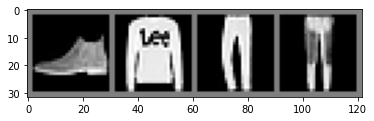

Ankle boot Pullover Trouser Trouser
Predicted class 0: Ankle boot
Predicted class 1: Pullover
Predicted class 2: Trouser
Predicted class 3: Trouser


In [70]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# Get one batch
dataiter = iter(testloader)
images, labels = dataiter.next()
# Plt show on the batch
imshow(torchvision.utils.make_grid(images))

# Print labels over batch
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Make a prediction with our trained net
output = net(images)

# Get the index with the highest value from the 10 output features
_, predicted = torch.max(output, 1)

for i in range(4):
    print("Predicted class " + str(i) +  ": " + classes[predicted[i]])

In [75]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        # Use item() because labels and predicted are tensors
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
accuracy = correct / total
print("Accuracy of net on 10,000 images: " + str(100 * accuracy) + "%")

Accuracy of net on 10,000 images: 83.65%
